BSM公式
$$
C = S_0 e^{(b-r)T} N(d_1) - K e^{-rT} N(d_2)
$$
$$
P = K e^{-rT} N(-d_2) - S_0 e^{(b-r)T} N(-d_1)
$$
其中：
$$d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(b + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}},d_2 = d_1 - \sigma \sqrt{T}$$
$$
$$
当b=r时，为标准的无股利定价；
$$
$$
当b=0时，为期货期权定价；
$$
$$
当b=r-q时，为支付股利q的期权定价；
$$
$$
当b=r-rf时，为外汇期权定价。
$$


In [58]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 定义BSM函数
def BSM(CP, S, K, sigma, T, r, b):
    """
    Parameters
    ----------
    CP：看涨或看跌"C"or"P"
    S : 标的价格.
    X : 行权价格.
    sigma :波动率.
    T : 年化到期时间. 即，到期时间（以天数为单位）/252
    r : 收益率.
    b : 持有成本，当b = r 时，为标准的无股利模型，b=0时，为期货期权，b为r-q时，为支付股利模型，b为r-rf时为外汇期权.
    Returns
    -------
    返回欧式期权的估值
    """
    d1 = (np.log(S / K) + (b + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if CP == "C":
        value = S * np.exp((b - r) * T) * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)  # stats.norm.cdf() 是 SciPy 库中 stats 模块的一个函数，用于计算标准正态分布的累积分布函数 (CDF)。CDF 返回的是一个给定值小于或等于某个特定值的概率。
    else:
        value = K * np.exp(-r * T) * stats.norm.cdf(-d2) - S * np.exp((b - r) * T) * stats.norm.cdf(-d1)
    return value

BSM(CP="C", S=100, K=95, sigma=0.25, T=1, r=0.03, b=0.03)

13.961178316327675

期权价格的影响因素

In [59]:
plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 正常显示负号

1.股票价格S

看涨期权收益为S-K，因此股票价格上升，看涨期权价值增大；股票价格下跌，看涨期权价值减小
  
看跌期权收益为K-S，因此股票价格上升，看涨期权价值减小；股票价格下跌，看涨期权价值增大  

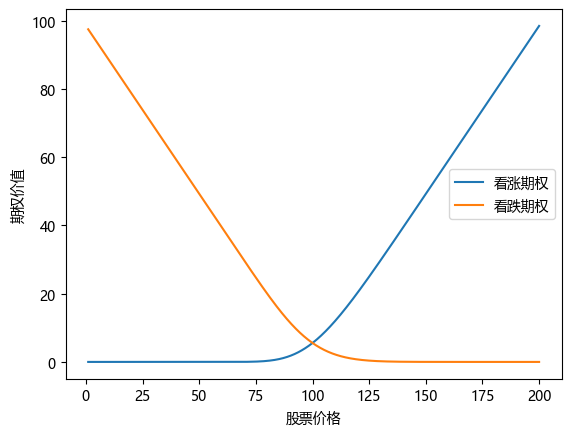

In [60]:
S_array = np.linspace(1,200,1000) #股票价格从1到200等间隔取1000个
V_array_C = BSM(
    CP="C", S=S_array, K=100, sigma=0.2, T=0.5, r=0.03, b=0
)  # 用BSM模型计算对应每个股票价格的看涨期权的价格，将结果储存在数组V_array_C中
V_array_P = BSM(
    CP = "P",S = S_array,K = 100,sigma = 0.2,T = 0.5,r = 0.03,b = 0
)
plt.plot(S_array,V_array_C,label="看涨期权")
plt.plot(S_array,V_array_P,label="看跌期权")
plt.xlabel("股票价格")
plt.ylabel("期权价值")
plt.legend()
plt.show()

2.到期时间T

对美式期权而言，到期时间增加，看涨期权和看跌期权的价值都会增加（至少不会减少），因为长期限期权持有者拥有短期限期权持有者所有行使期权的权利。

对于欧式期权而言，到期时间增加，看涨期权和看跌期权的价值一般会增加，但这一结论并非总成立。


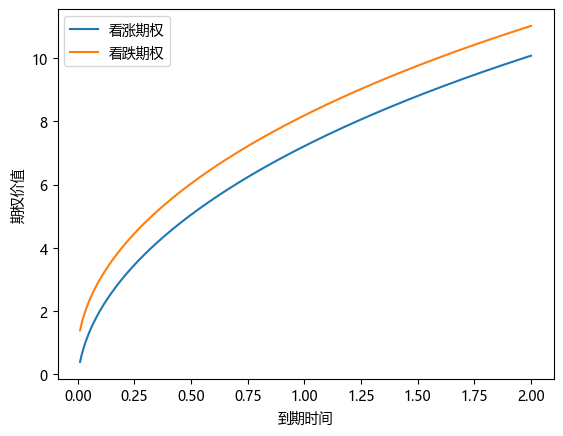

In [61]:
T_array = np.linspace(0.01, 2, 1000) # 到期时间从0.01到2等间隔取1000个
V_array_C = BSM(
    CP="C", S=99, K=100, sigma=0.2, T=T_array, r=0.03, b=0
)  # 用BSM模型计算对应每个到期时间的看涨期权的价格，将结果储存在数组V_array_C中
V_array_P = BSM(
    CP="P", S=99, K=100, sigma=0.2, T=T_array, r=0.03, b=0
)
plt.plot(T_array, V_array_C, label="看涨期权")
plt.plot(T_array, V_array_P, label="看跌期权")
plt.xlabel("到期时间")
plt.ylabel("期权价值")
plt.legend()
plt.show()

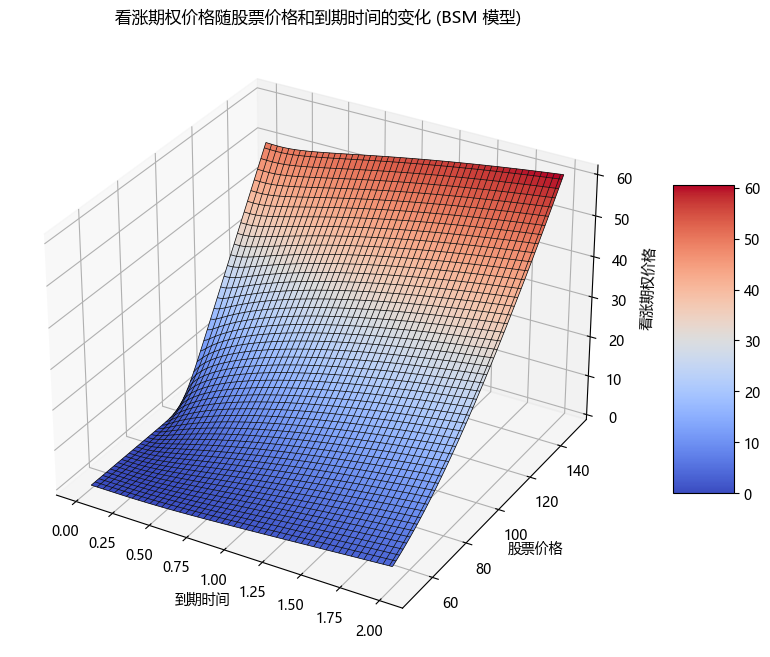

In [62]:
# 参数设置
S_array = np.linspace(50, 150, 100)  # 缩小样本数方便显示
T_array = np.linspace(0.01, 2, 100)
X = 100  # 执行价格
sigma = 0.5  # 波动率
r = 0.03  # 无风险利率
b = 0  # 便宜收益率

# 生成网格
S_grid, T_grid = np.meshgrid(S_array, T_array)

# 计算看涨期权价格
V_grid_C = BSM(CP="C", S=S_grid, K=X, sigma=sigma, T=T_grid, r=r, b=b)
# # 创建一个三维图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# 绘制3D曲面图
surf = ax.plot_surface(T_grid, S_grid, V_grid_C, cmap="coolwarm")
wireframe = ax.plot_wireframe(T_grid, S_grid, V_grid_C, color="black", linewidth=0.5)

fig.colorbar(surf, shrink=0.5, aspect=5)
# 设置轴标签
ax.set_ylabel("股票价格")
ax.set_xlabel("到期时间")
ax.set_zlabel("看涨期权价格")
ax.set_title("看涨期权价格随股票价格和到期时间的变化 (BSM 模型)")

plt.show()

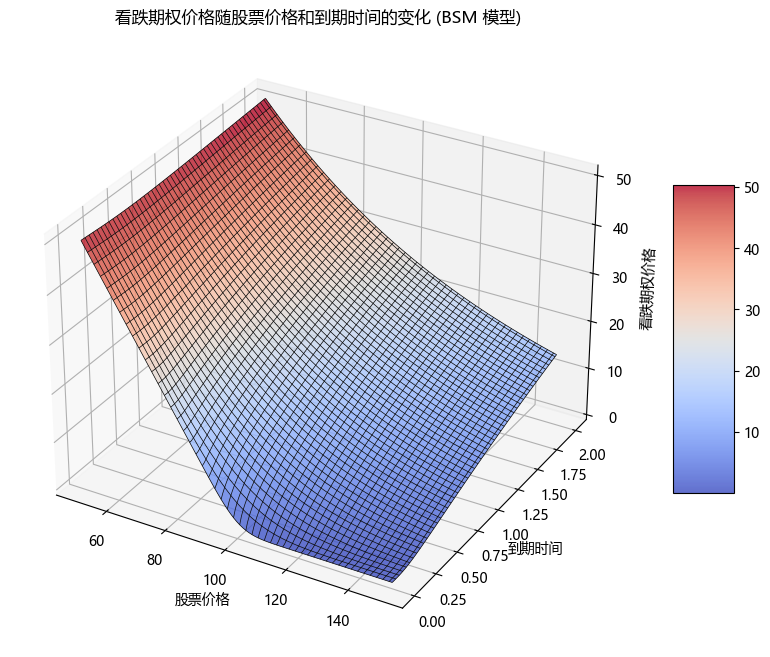

In [63]:
# 参数设置
S_array = np.linspace(50, 150, 100)  # 缩小样本数方便显示
T_array = np.linspace(0.01, 2, 100)
X = 100  # 执行价格
sigma = 0.5  # 波动率
r = 0.03  # 无风险利率
b = 0  # 便宜收益率

# 生成网格
S_grid, T_grid = np.meshgrid(S_array, T_array)

# 计算看涨期权价格
V_grid_C = BSM(CP="P", S=S_grid, K=X, sigma=sigma, T=T_grid, r=r, b=b)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# 绘制3D曲面图
surf = ax.plot_surface(
    S_grid, T_grid, V_grid_C, cmap="coolwarm", alpha=0.8, edgecolor="none"
)
wireframe = ax.plot_wireframe(S_grid, T_grid, V_grid_C, color="black", linewidth=0.5)

fig.colorbar(surf, shrink=0.5, aspect=5)

# 设置轴标签
ax.set_xlabel("股票价格")
ax.set_ylabel("到期时间")
ax.set_zlabel("看跌期权价格")
ax.set_title("看跌期权价格随股票价格和到期时间的变化 (BSM 模型)")

plt.show()

3.波动率$\sigma$

波动率用于衡量标的资产价格变动的不确定性。当波动率增大时，资产价格大幅度上升或下降的机会增大，对于看涨期权或看跌期权的持有者而言，更能够从资产价格变动中获利，而最大损失只是期权费用。因此波动率增大，期权价值上升；波动率减小，期权价值下降。

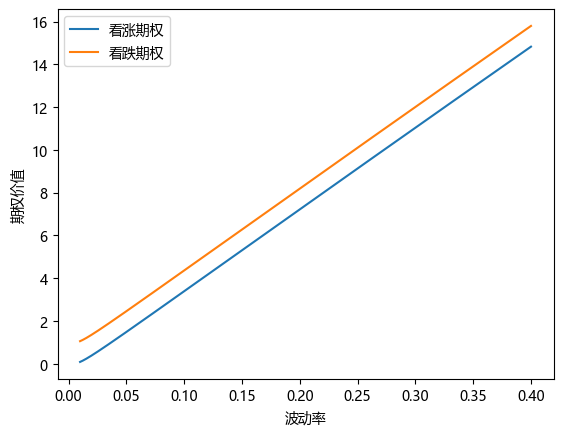

In [65]:
sigma_array = np.linspace(0.01,0.40,1000) # 波动率从0.01到0.40等间隔取1000个
V_array_C = BSM(
    CP = "C",S = 99,K = 100,sigma = sigma_array,T = 1,r = 0.03,b = 0
)# 用BSM模型计算对应每个波动率的看涨期权的价格，将结果储存在数组V_array_C中
V_array_P = BSM(
    CP = "P",S = 99,K = 100,sigma = sigma_array,T = 1,r = 0.03,b = 0
)
plt.plot(sigma_array,V_array_C,label="看涨期权")
plt.plot(sigma_array,V_array_P,label="看跌期权")
plt.xlabel("波动率")
plt.ylabel("期权价值")
plt.legend()
plt.show()

波动率的求解


1.由历史数据求解波动率

$$
\ln \frac{S_T}{S_0} \sim \phi[ \left( \mu - \frac{1}{2} \sigma^2 \right) T ,  \sigma^2 T]
$$

In [66]:
import numpy as np
import pandas as pd
import yfinance as yf


symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

# 使用yfinance下载数据
data = yf.download(symbol, start=start_date, end=end_date)

# 计算对数收益率
data["Log_Returns"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))

# 计算标准差（即波动率）
volatility = data["Log_Returns"].std()

# 年化波动率
annual_volatility = volatility * np.sqrt(252)  # 252是交易天数

print(f"Annualized Volatility: {annual_volatility:.4f}")

[*********************100%%**********************]  1 of 1 completed

Annualized Volatility: 0.3561


2.BSM反向求解隐含波动率

隐含波动率是使得期权的市场价格与期权的理论价格（根据期权定价模型计算的价格）相等的波动率

2.1二分法

[1]设定隐含波动率可能的取值范围作为二分法的搜索范围。

[2]选择范围内的一个值作为波动率的初始值。

[3]根据期权定价模型（如BSM模型）计算期权的理论价格。

[4]比较期权市场价格和理论价格，如果市场价格高于理论价格，则意味着当前波动率可能过低，需要增大波动率，反之则需要减小波动率。

[5]利用二分法得到新的波动率。

[6]重复以上步骤直到找到市场价格与理论价格足够接近的隐含波动率值。一般来说，可以设定一个收敛标准（如价格差的绝对值小于某个阈值）来结束迭代过程。

In [113]:
# 定义二分法求隐含波动率的函数
def binary(C0, CP, S, K, T, r, b, vol_est=0.2):
    """
    Parameters
    ----------
    C0：期权价值
    CP：看涨或看跌"C"or"P"
    S : 标的价格.
    K : 行权价格.
    T : 年化到期时间.
    r : 收益率.
    b : 持有成本，当b = r 时，为标准的无股利模型，b=0时，为期货期权，b为r-q时，为支付股利模型，b为r-rf时为外汇期权.
    vol_est：预计的初始波动率
    Returns
    -------
    返回看涨期权的隐含波动率。
    """
    start = 0  # 初始波动率下限
    end = 2  # 初始波动率上限
    c = 1  # 初始化一个非零差异，以进入循环
    while abs(c) >= 0.0001:  # 设置迭代的精度，直到达到所需的波动率精度
        try:
            val = BSM(CP, S, K, vol_est, T, r, b)  # 使用BSM模型计算期权价值
        except ZeroDivisionError:
            print("期权的内在价值大于期权的价格，无法收敛出波动率，会触发除0错误")
            break
        if val - C0 > 0:  # 若计算的期权价值大于实际价值，说明使用的波动率偏大
            end = vol_est
            vol_est = (start + end) / 2 #二分法获得迭代后的波动率
            c = end - vol_est  # 计算新的差异
        else:  # 若计算的期权价值小于实际价值，说明使用的波动率偏小
            start = vol_est
            vol_est = (start + end) / 2
            c = start - vol_est
    return round(vol_est, 4)  # 返回四舍五入的隐含波动率值


value = BSM(CP="C", S=200, K=10, T=1, sigma=0.01, r=0.03, b=0)  # 用BSM计算一个期权的理论价值
print(value)

vol = binary(C0=value, CP="C", S=200, K=10, T=1, r=0.03, b=0)  # 根据期权的理论价值利用二分法反向求解隐含波动率
print(vol)

184.38465137421656
0.3878


3.波动率微笑

      行权价格 (K)  波动率 (sigma)  期权价格 (prices_C)  隐含波动率 (vols_C)
0     1.000000     0.100000        96.074108          0.5942
1     5.061224     0.106122        92.132911          0.3833
2     9.122449     0.112245        88.191713          0.3116
3    13.183673     0.118367        84.250516          0.2408
4    17.244898     0.124490        80.309319          0.2207
5    21.306122     0.130612        76.368122          0.2006
6    25.367347     0.136735        72.426925          0.1767
7    29.428571     0.142857        68.485728          0.1593
8    33.489796     0.148980        64.544530          0.1493
9    37.551020     0.155102        60.603333          0.1552
10   41.612245     0.161224        56.662136          0.1612
11   45.673469     0.167347        52.720942          0.1673
12   49.734694     0.173469        48.779817          0.1735
13   53.795918     0.179592        44.839445          0.1796
14   57.857143     0.185714        40.903646          0.1856
15   61.918367     0.191

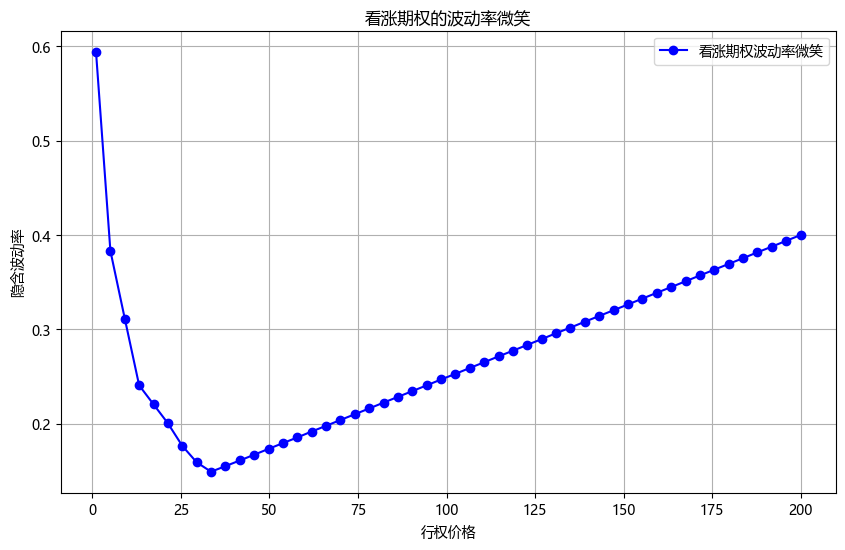

In [142]:
# 生成模拟数据
S = 100  # 当前股价
K = np.linspace(1, 200, 50)  # 行权价格
T = 1  # 到期时间
r = 0.03  # 无风险利率
b = 0  # 持有成本

# 模拟不同波动率下的期权价格
sigma_values = np.linspace(0.1, 0.4, len(K))  # 波动率从0.1到0.4
prices_C = np.array(
    [BSM("C", S, k, sigma, T, r, b) for k, sigma in zip(K, sigma_values)]
)

# 计算隐含波动率
vols_C = np.array([binary(price, "C", S, k, T, r, b) for price, k in zip(prices_C, K)])
# 创建一个 DataFrame
df = pd.DataFrame(
    {
        "行权价格 (K)": K,
        "波动率 (sigma)": sigma_values,
        "期权价格 (prices_C)": prices_C,
        "隐含波动率 (vols_C)": vols_C,
    }
)

# 打印 DataFrame
print(df)
# 绘制波动率微笑
plt.figure(figsize=(10, 6))
plt.plot(K, vols_C, marker="o", linestyle="-", color="b", label="看涨期权波动率微笑")
plt.xlabel("行权价格")
plt.ylabel("隐含波动率")
plt.title("看涨期权的波动率微笑")
plt.legend()
plt.grid(True)
plt.show()

      行权价格 (K)  波动率 (sigma)  期权价格 (prices_P)  隐含波动率 (vols_P)
0     1.000000     0.050000     0.000000e+00          0.1220
1     5.061224     0.055102     0.000000e+00          0.0792
2     9.122449     0.060204     0.000000e+00          0.0636
3    13.183673     0.065306    8.881138e-213          0.0653
4    17.244898     0.070408    8.566750e-139          0.0704
5    21.306122     0.075510     2.872589e-94          0.0755
6    25.367347     0.080612     7.166396e-66          0.0806
7    29.428571     0.085714     5.211781e-47          0.0856
8    33.489796     0.090816     4.273492e-34          0.0907
9    37.551020     0.095918     4.823816e-25          0.0960
10   41.612245     0.101020     1.414135e-18          0.1011
11   45.673469     0.106122     6.963333e-14          0.1062
12   49.734694     0.111224     1.958757e-10          0.1112
13   53.795918     0.116327     7.172532e-08          0.1163
14   57.857143     0.121429     6.023218e-06          0.1214
15   61.918367     0.126

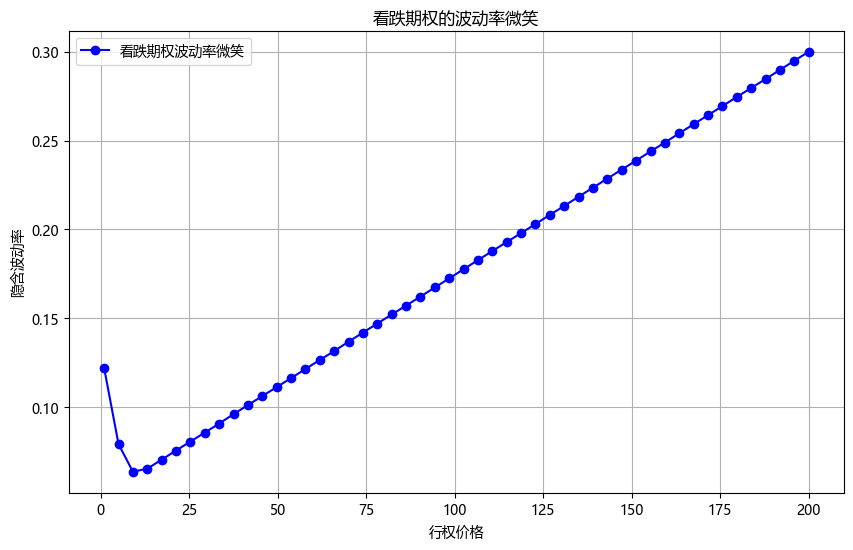

In [143]:
# 生成模拟数据
S = 100  # 当前股价
K = np.linspace(1, 200, 50)  # 行权价格
T = 1  # 到期时间
r = 0.03  # 无风险利率
b = 0  # 持有成本

# 模拟不同波动率下的期权价格
sigma_values = np.linspace(0.05, 0.3, len(K))  # 波动率从0.1到0.4
prices_P = np.array(
    [BSM("P", S, k, sigma, T, r, b) for k, sigma in zip(K, sigma_values)]
)

# 计算隐含波动率
vols_P = np.array([binary(price, "P", S, k, T, r, b) for price, k in zip(prices_P, K)])

# 创建一个 DataFrame
df = pd.DataFrame(
    {
        "行权价格 (K)": K,
        "波动率 (sigma)": sigma_values,
        "期权价格 (prices_P)": prices_P,
        "隐含波动率 (vols_P)": vols_P,
    }
)

# 打印 DataFrame
print(df)

# 绘制波动率微笑
plt.figure(figsize=(10, 6))
plt.plot(K, vols_P, marker="o", linestyle="-", color="b", label="看跌期权波动率微笑")
plt.xlabel("行权价格")
plt.ylabel("隐含波动率")
plt.title("看跌期权的波动率微笑")
plt.legend()
plt.grid(True)
plt.show()